In [2]:
import cv2
import supervision as sv
from ultralytics import YOLO
import numpy as np

In [3]:
image = cv2.imread("img\metro.jpg")

In [4]:
model = YOLO('yolov8s.pt')

In [5]:

#Lấy phần tử đầu tiên của kết quả trả về: bounding boxes, độ tin cậy, nhãn lớp
result = model.predict(image, conf=0.5, iou = 1)[0]


0: 640x384 26 persons, 442.2ms
Speed: 14.7ms preprocess, 442.2ms inference, 3.8ms postprocess per image at shape (1, 3, 640, 384)


In [6]:
#Lưu các thông tin đã trích xuất từ result vào các thuộc tính:
#xyxy, confidence, class_idid
detections = sv.Detections.from_ultralytics(result)
detections 

Detections(xyxy=array([[     2.4818,      1233.3,      597.75,      2556.8],
       [     3.3986,      1234.4,      598.36,      2558.7],
       [     3.7214,      1233.4,      599.12,      2558.2],
       [     2.6385,      1232.8,      597.78,      2556.6],
       [      2.816,      1240.5,      597.72,      2557.9],
       [     2.3804,      1233.8,      597.59,      2557.8],
       [     3.9324,      1234.5,      598.36,      2557.3],
       [     3.0701,      1233.7,      598.45,      2556.2],
       [     2.3871,      1239.8,      598.43,        2558],
       [     749.97,      1275.1,      1232.2,      2557.4],
       [     748.82,      1274.8,      1231.7,      2558.4],
       [     1.5963,      1234.9,      596.32,      2557.2],
       [     747.26,      1274.8,      1229.5,      2558.3],
       [     749.57,      1275.3,      1232.2,      2559.4],
       [     749.51,      1275.6,      1232.4,      2556.3],
       [     747.78,      1274.2,        1233,      2558.5],
       [

In [7]:
import matplotlib.pyplot as plt

In [8]:
a = detections['xyxy'] = detections.xyxy
a

array([[     2.4818,      1233.3,      597.75,      2556.8],
       [     3.3986,      1234.4,      598.36,      2558.7],
       [     3.7214,      1233.4,      599.12,      2558.2],
       [     2.6385,      1232.8,      597.78,      2556.6],
       [      2.816,      1240.5,      597.72,      2557.9],
       [     2.3804,      1233.8,      597.59,      2557.8],
       [     3.9324,      1234.5,      598.36,      2557.3],
       [     3.0701,      1233.7,      598.45,      2556.2],
       [     2.3871,      1239.8,      598.43,        2558],
       [     749.97,      1275.1,      1232.2,      2557.4],
       [     748.82,      1274.8,      1231.7,      2558.4],
       [     1.5963,      1234.9,      596.32,      2557.2],
       [     747.26,      1274.8,      1229.5,      2558.3],
       [     749.57,      1275.3,      1232.2,      2559.4],
       [     749.51,      1275.6,      1232.4,      2556.3],
       [     747.78,      1274.2,        1233,      2558.5],
       [      747.6,    

In [9]:
temp = np.array(a) 
temp = temp.astype(int)
temp  

array([[   2, 1233,  597, 2556],
       [   3, 1234,  598, 2558],
       [   3, 1233,  599, 2558],
       [   2, 1232,  597, 2556],
       [   2, 1240,  597, 2557],
       [   2, 1233,  597, 2557],
       [   3, 1234,  598, 2557],
       [   3, 1233,  598, 2556],
       [   2, 1239,  598, 2557],
       [ 749, 1275, 1232, 2557],
       [ 748, 1274, 1231, 2558],
       [   1, 1234,  596, 2557],
       [ 747, 1274, 1229, 2558],
       [ 749, 1275, 1232, 2559],
       [ 749, 1275, 1232, 2556],
       [ 747, 1274, 1232, 2558],
       [ 747, 1275, 1232, 2555],
       [ 746, 1274, 1232, 2555],
       [ 748, 1275, 1233, 2560],
       [1025, 1377, 1440, 2559],
       [1008, 1385, 1440, 2559],
       [1007, 1381, 1439, 2559],
       [1013, 1381, 1438, 2558],
       [1010, 1381, 1440, 2557],
       [ 748, 1283, 1235, 2559],
       [1029, 1378, 1438, 2558]])

#### Kết quả trước khi áp dụng NMS

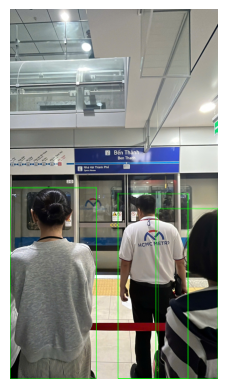

In [10]:
image_before_nms = image.copy()
for xmin, ymin, xmax, ymax in temp:
    cv2.rectangle(image_before_nms, (xmin, ymin), (xmax, ymax), (0, 255, 0), 1)

plt.axis('off')
plt.imshow(cv2.cvtColor(image_before_nms, cv2.COLOR_BGR2RGB))
plt.show()

In [11]:
b = detections.confidence
b = np.array(b)
b = b.astype(float)
b

array([    0.94452,     0.94337,     0.93981,     0.93899,     0.93672,     0.93658,     0.93551,     0.93495,     0.93151,     0.92488,     0.92392,     0.92063,     0.91931,     0.91886,     0.91858,     0.91624,     0.90327,     0.90168,     0.87827,     0.63125,     0.61072,     0.58869,     0.58569,     0.57708,
           0.53327,     0.52687])

In [12]:
new_dataset = zip(temp, b)
tmp = 0
for boxes, score in new_dataset:
    print(f"Index: {tmp}, Bounding box: {boxes}, Confidence: {score}")
    tmp += 1 

Index: 0, Bounding box: [   2 1233  597 2556], Confidence: 0.9445242285728455
Index: 1, Bounding box: [   3 1234  598 2558], Confidence: 0.9433660507202148
Index: 2, Bounding box: [   3 1233  599 2558], Confidence: 0.9398081302642822
Index: 3, Bounding box: [   2 1232  597 2556], Confidence: 0.9389870762825012
Index: 4, Bounding box: [   2 1240  597 2557], Confidence: 0.9367167949676514
Index: 5, Bounding box: [   2 1233  597 2557], Confidence: 0.9365832209587097
Index: 6, Bounding box: [   3 1234  598 2557], Confidence: 0.9355120062828064
Index: 7, Bounding box: [   3 1233  598 2556], Confidence: 0.9349495768547058
Index: 8, Bounding box: [   2 1239  598 2557], Confidence: 0.9315141439437866
Index: 9, Bounding box: [ 749 1275 1232 2557], Confidence: 0.9248833656311035
Index: 10, Bounding box: [ 748 1274 1231 2558], Confidence: 0.9239155650138855
Index: 11, Bounding box: [   1 1234  596 2557], Confidence: 0.9206336736679077
Index: 12, Bounding box: [ 747 1274 1229 2558], Confidence: 0.

In [13]:
new_dataset = zip(temp, b)
bounding_box =[]
score_bb = []
for boxes, score in new_dataset:
    bounding_box.append(boxes)
    score_bb.append(score)

In [14]:
bounding_box = np.array(bounding_box)
bounding_box = bounding_box.astype(int)
bounding_box

array([[   2, 1233,  597, 2556],
       [   3, 1234,  598, 2558],
       [   3, 1233,  599, 2558],
       [   2, 1232,  597, 2556],
       [   2, 1240,  597, 2557],
       [   2, 1233,  597, 2557],
       [   3, 1234,  598, 2557],
       [   3, 1233,  598, 2556],
       [   2, 1239,  598, 2557],
       [ 749, 1275, 1232, 2557],
       [ 748, 1274, 1231, 2558],
       [   1, 1234,  596, 2557],
       [ 747, 1274, 1229, 2558],
       [ 749, 1275, 1232, 2559],
       [ 749, 1275, 1232, 2556],
       [ 747, 1274, 1232, 2558],
       [ 747, 1275, 1232, 2555],
       [ 746, 1274, 1232, 2555],
       [ 748, 1275, 1233, 2560],
       [1025, 1377, 1440, 2559],
       [1008, 1385, 1440, 2559],
       [1007, 1381, 1439, 2559],
       [1013, 1381, 1438, 2558],
       [1010, 1381, 1440, 2557],
       [ 748, 1283, 1235, 2559],
       [1029, 1378, 1438, 2558]])

In [15]:
score_bb = np.array(score_bb)
score_bb

array([    0.94452,     0.94337,     0.93981,     0.93899,     0.93672,     0.93658,     0.93551,     0.93495,     0.93151,     0.92488,     0.92392,     0.92063,     0.91931,     0.91886,     0.91858,     0.91624,     0.90327,     0.90168,     0.87827,     0.63125,     0.61072,     0.58869,     0.58569,     0.57708,
           0.53327,     0.52687])

In [16]:
indices = cv2.dnn.NMSBoxes(bboxes=bounding_box, scores=score_bb,
                           score_threshold=0, nms_threshold=0.7)
print(indices)

[ 0  9 19]


In [17]:
filtered_boxes = [bounding_box[i] for i in indices.flatten()]
filtered_boxes

[array([   2, 1233,  597, 2556]),
 array([ 749, 1275, 1232, 2557]),
 array([1025, 1377, 1440, 2559])]

In [18]:
filtered_scores = [score_bb[i] for i in indices.flatten()]
filtered_scores

[np.float64(0.9445242285728455),
 np.float64(0.9248833656311035),
 np.float64(0.6312544345855713)]

#### Kết quả sau khi áp dụng NMS với ngưỡng threshold = 0.7

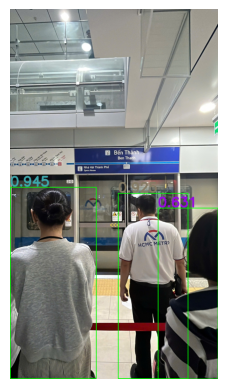

In [19]:
image_with_scores = image.copy()

for (xmin, ymin, xmax, ymax), score in zip(filtered_boxes, filtered_scores):
    color = tuple(np.random.randint(0, 256, size=3).tolist())
    cv2.rectangle(image_with_scores, (xmin, ymin), (xmax, ymax), (0, 255, 0), 3)
    text = f"{score:.3f}"
    cv2.putText(image_with_scores, text, (xmin, ymin - 10), cv2.FONT_HERSHEY_SIMPLEX, 3, color, 12)

plt.axis('off')
plt.imshow(cv2.cvtColor(image_with_scores, cv2.COLOR_BGR2RGB))
plt.show()

In [20]:
for (xmin, ymin, xmax, ymax), score in zip(filtered_boxes, filtered_scores):
    print(f"Bounding box: ({xmin}, {ymin}), ({xmax}, {ymax}) - Score: {score:.3f}")

Bounding box: (2, 1233), (597, 2556) - Score: 0.945
Bounding box: (749, 1275), (1232, 2557) - Score: 0.925
Bounding box: (1025, 1377), (1440, 2559) - Score: 0.631


#### Threhold 0.5

In [21]:
new_indices = cv2.dnn.NMSBoxes(bboxes=bounding_box, scores=score_bb,
                           score_threshold=0, nms_threshold=0.5)
print(new_indices)

[0 9]


In [22]:
filtered_boxes_nms05 = [bounding_box[i] for i in new_indices.flatten()]
filtered_boxes_nms05

[array([   2, 1233,  597, 2556]), array([ 749, 1275, 1232, 2557])]

In [23]:
filtered_scores_nms05 = [score_bb[i] for i in new_indices.flatten()]
filtered_scores_nms05

[np.float64(0.9445242285728455), np.float64(0.9248833656311035)]

#### Kết quả sau khi áp dụng NMS với ngưỡng Threshold = 0.5

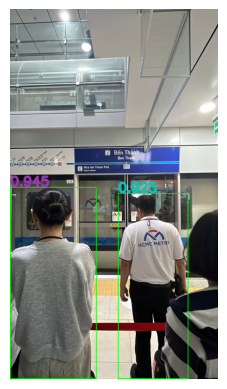

In [24]:
image_with_soft = image.copy()

for (xmin, ymin, xmax, ymax), score in zip(filtered_boxes_nms05, filtered_scores_nms05):
    color = tuple(np.random.randint(0, 256, size=3).tolist())
    cv2.rectangle(image_with_soft, (xmin, ymin), (xmax, ymax), (0, 255, 0), 3)
    text = f"{score:.3f}"
    cv2.putText(image_with_soft, text, (xmin, ymin - 10), cv2.FONT_HERSHEY_SIMPLEX, 3, color, 15)

plt.axis('off')
plt.imshow(cv2.cvtColor(image_with_soft, cv2.COLOR_BGR2RGB))
plt.show()

In [25]:
for (xmin, ymin, xmax, ymax), score in zip(filtered_boxes_nms05, filtered_scores_nms05):
    print(f"Bounding box: ({xmin}, {ymin}), ({xmax}, {ymax}) - Score: {score:.3f}")

Bounding box: (2, 1233), (597, 2556) - Score: 0.945
Bounding box: (749, 1275), (1232, 2557) - Score: 0.925


In [26]:
# import numpy as np

# # Giả sử IoU giữa hai bounding boxes là 0.5
# iou = 0.5
# eta = 0.5

# # Điểm số ban đầu
# initial_score = 0.95

# # Tính điểm số sau khi áp dụng Soft-NMS
# reduced_score = initial_score * np.exp(-(iou ** 2) / eta)
# print(f"Điểm số sau khi giảm: {reduced_score:.4f}")